### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packethas 500 grams of biryani (also mentioned on the label of packet). You are sceptic of theirclaims and believe that on average each packet does not contain 500 grams of biryani.How do you prove your claim?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [14]:
# Function to calculate the mean and standard deviation 
import math
def get_mean(values):
    return sum(values)*1.0/len(values)

def get_std(values):
    length=len(values)
    m=get_mean(values)
    total_sum=0
    for i in range(length):
        total_sum+=(values[i]-m)**2
        under_root=total_sum*1.0/(length-1)
    return math.sqrt(under_root)

In [20]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

### step-1:

Alternative Hypotesis (Bold claim) :$$ H_1 : \mu \neq 500 $$ ,
                                                     average weight of each packet doesnt contains 500g of Biriyani

Null Hypotesis(status quo) : $$H_2 : \mu =  500$$ , each packet contains 500g of weight

### step-2:

 - collect a sample of size n =10   $$[490,220,470,500,495,496,498,508,480]$$

 - compute the sample mean : $\bar x$ = ?

In [17]:
x=[490,220,470,500,495,496,496,498,508,480]
sample_mean=get_mean(x)
sample_std = get_std(x)
print('sample_mean:',sample_mean)
print('sample_std(s):',round(sample_std,4))

sample_mean: 465.3
sample_std(s): 86.8486


### step -3:

###  compute test statistic: $$t = \frac{\bar {x} -\mu}{s\sqrt[2]{n}}$$

In [22]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std =86.8486

In [23]:
# Calculating the t-score
t_cal= t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_cal)

-1.2634749991115888


### step - 4

#### Decide  𝛼  or significance level

In [24]:
# Two tail

alpha = 1 - 0.95  # With 95% confidence or 5% level of significance

#For sample size n=10 => Degrees of freedom=10-1=> 9

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


### Step-5:Apply Decision rule
 5.1 two-tailed t-test: $$ reject \ H_0 \ or \ H_1 \ ? $$

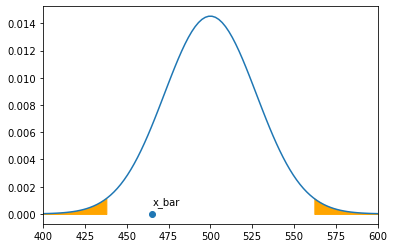

In [26]:
# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007));

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

In [29]:
#conclusion using t test

if(np.abs(t_cal) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


### Step - 5.2: Compute p-value

In [31]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t_cal)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641852588997756
Fail to reject Null Hypothesis


### Conclusion

Hence biriyani packed doesnot contains 500g of weight

### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

### Step - 1 : 

Alernative Hypothesis (Bold Claim):$$ H_1: \mu > 4$$ Average rating is greather than 4

Null Hypothesis(Status Quo): $$ H_2 = \mu \leq 4 $$ Average rating is not greather than 4
    

### Step - 2 :

Collect a Sample size of n = 20  $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$

In [36]:
l=[4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] 
sample_mean= get_mean(l)
sample_std= get_std(l)
print('sample_mean   :',sample_mean)
print('sample_std(s) :',round(sample_std,4))

sample_mean   : 4.25
sample_std(s) : 0.8507


### Step - 3 :

Compute test Statistics: $$ t = \frac{\bar{x} - mu}{s/\sqrt[2]{n}}$$

In [38]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4
pop_std = 0.5

In [39]:
# Calculating the t-score
t_cal=t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_cal)

1.3142574813455419


### Step - 4 :

Decice $ \alpha $

In [ ]:
# Two tail
confidence_level = 0.95 # with 95% confidence

alpha = 1 - confidence_level # With 95% confidence or 5% level of significance

#For sample size n=20 => Degrees of freedom=20-1=> 19
t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

### Step-5:Apply Decision rule

5.1 - two tailed t test $$ reject \ H_o \ or \ H_1 \ ?  $$

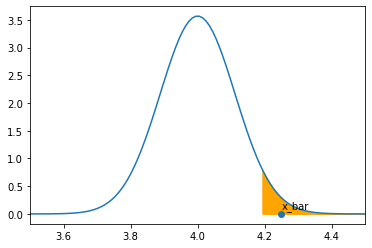

In [48]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1));

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [44]:
# Conclusion using t test

if(np.abs(t_cal) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


### 5.2 P-test

In [49]:
# Conclusion using p test

p_value = (1.0 - norm.cdf(np.abs(t_cal)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09437978527056279
Fail to reject Null Hypothesis


### Conclusion:

Avarage rating is not greater than 4

### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?


### Step - 1 :

Null Hypothesis : $H_1 \ (Bold \ Claim)\$

$H_1 : \mu\ > 15 \ , \ The \ Avarage \ Mileage\ of  \ fuel \ management \ system \ of \ SUV's \ is \ Greater\ than \ 15 \ km/litre \  $$ $

Alteranative Hypothesis: $ H_0 \ (Status \  Quo)$

$ H_0 : \mu \leq   \ 15 \ , \ The \ Avarage \ Mileage\ of  \ fuel \ management \ system \ of \ SUV's \ is \ less\ than \ 15 \ km/litre \ $

### Step - 2 :

 Collect a sample size of 20 :$$ \ sample = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$



In [55]:
m=[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] 
sample_mean=get_mean(m)
sample_std=get_std(m)
print('sample_mean   :',round(sample_mean,4))
print('sample_std(s) :',round(sample_std,4))

sample_mean   : 15.099
sample_std(s) : 1.0254


### step - 3 :

Test Statstics : $$ t =  \frac {\bar {x} - \mu}{s/\sqrt[2]{n}} $$

In [59]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 15.099
pop_mean = 15
sample_std = 1.0254

In [60]:
# Calculating the t-score
t_cal=t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_cal)

0.4317743900379942


### Step - 4 :

In [61]:
# One tail
confidence_level = 0.95 # with 95% confidence

alpha = 1 - confidence_level # With 95% confidence or 5% level of significance

#For sample size n=100 => Degrees of freedom=20-1=> 19
t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


### Step - 5.1

 two-tailed t-test: $$ reject \ H_0 \ or \ H_1 \ ? $$

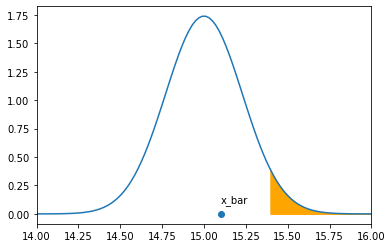

In [63]:
# Defining the x minimum and x maximum
x_min = 14
x_max = 16


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical values (One tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.10));

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis



In [64]:
# Conclusion using t test

if(np.abs(t_cal) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


### 5.2    P-test

In [65]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_cal))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33295269728673693
Fail to reject Null Hypothesis


### Conclusion

Average fuel management system of an SUV's is not greather than 15km/ltr

### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?


Variance  = ?

### Step - 1 :

$ \ Null \ Hypothesis \ : \ H_1 \ (Bold \ Claim) $

$ H_1 : \mu < 100\ , \ Avarage \ time \  to\  claim \ for \ any \ data \ point \ is \ less \ than \ 100\ ms $

 $ \ Alernative \  Hypothesis \ : H_0  \ (Status \ Quo) $

$ H_0 \ : \ mu \geq  \ 100 \ , \ Avarage \ time \ to \ claim \ for \ any \ data \ point \ is \ greather \ than \ or \ equals \ to \  100 \ ms $

### Step - 2 :

#### Mean and Standard Deviation Of Given Sample

In [110]:
random=42
n=list(np.random.uniform(98,101,25))

In [111]:
# Defining the sample and population parameters
sample_size=25
pop_mean=100

sample_mean=get_mean(n)
sample_std=get_std(n)

# printing the sample mean and std
print('sample_mean   :',round(sample_mean,4))
print('sample_std(s) :',round(sample_std,4))

sample_mean   : 99.3425
sample_std(s) : 1.0017


### Step - 3 :

#### Compute Test Statstics

$$ t  =  \frac{\bar{x} - mu}{s/ \sqrt[2]\ {n}}$$

In [112]:
#Calculating the t-score

t_cal =t_score(sample_size,sample_mean,pop_mean,sample_std)
print(t_cal)

-3.281582480145285


### Step - 4 :

#### Decide  𝛼  or significance level

In [113]:
# one tail 
confidence_level = 0.99 #with 99% confidence level

alpha  = 1 - confidence_level # with 99% confidence level or 1% level of significance

#for sample size n = 25 , degree of freedom  = 25 - 1 = 24

t_critical = t.ppf(1-alpha,df  = 24)
t_critical

2.4921594731575762

### Step - 5.1 :

#### 2 - tailed - t - test

$ reject \  H_1 \ or \ H_0 \ ? $

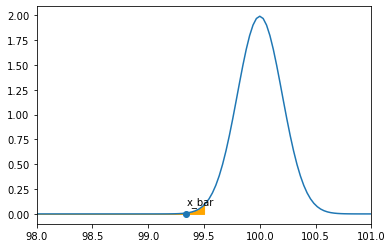

In [114]:
# Defining the x minimum and x maximum
x_min =98
x_max = 101

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.10));

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

In [115]:
# conclusion using t_critical

if(np.abs(t_cal) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [116]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_cal))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0005161316468880184
Reject Null Hypothesis


### Conclusion :

#### Average time to claim any data point is greather than or equals to 100ms